## Softmax Classifier with TF

In [250]:
from matplotlib import pyplot as plt
import numpy as np
import time
from IPython.display import clear_output

In [251]:
import tensorflow as tf

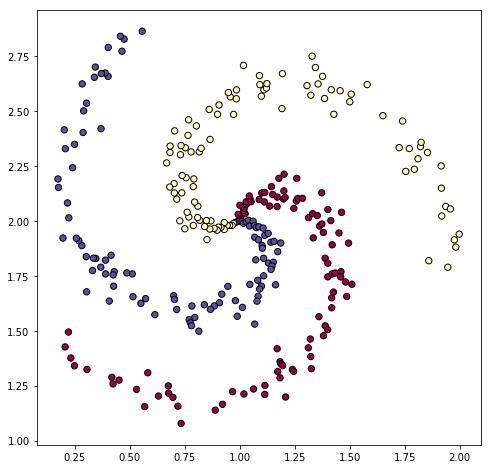

In [252]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
X[:, 0] += 1
X[:, 1] += 2
# lets visualize the data:
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolors="black")
ax = plt.gca()
ax.set_aspect("equal")
plt.show()

In [4]:
def plot(h=0.02):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                 np.arange(y_min, y_max, h))
    Z = sess.run(t_prediction, feed_dict={t_x: np.column_stack([xx.ravel(), yy.ravel()])})
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10,8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolors="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.gca().set_aspect("equal")
    plt.show()

### Linear SoftMax Classifier

In [5]:
t_x = tf.placeholder(tf.float32, shape=[None, D])
t_y = tf.placeholder(tf.int32, shape=[None])

In [6]:
W0 = tf.Variable(tf.random_normal([D, 100]))
b0 = tf.Variable(tf.zeros([1, 100], dtype=tf.float32))

In [7]:
W1 = tf.Variable(tf.random_normal([100, 50]))
b1 = tf.Variable(tf.zeros([1, 50], dtype=tf.float32))

In [8]:
W = tf.Variable(tf.random_normal([50, K]))
b = tf.Variable(tf.zeros([1, K], dtype=tf.float32))

In [9]:
# some hyperparameters
step_size = 0.1
reg = 1e-3 # regularization strength

t_out0 = tf.matmul(t_x, W0) + b0

t_out0_1 = tf.nn.sigmoid(t_out0)

t_out1 = tf.matmul(t_out0_1, W1) + b1

t_out1_1 = tf.nn.relu(t_out1)

t_scores = tf.matmul(t_out1_1, W) + b
t_prediction = tf.argmax(t_scores, axis=-1, output_type=tf.int32)
t_acc = tf.reduce_mean(tf.cast(tf.equal(t_prediction, t_y), tf.float32))
t_loss_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
    labels=t_y, logits=t_scores)
t_loss_reg = tf.reduce_sum(W * W) * reg + tf.reduce_sum(W1 * W1) * reg
t_loss = tf.reduce_mean(t_loss_entropy + t_loss_reg)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=step_size)

train_op = optimizer.minimize(t_loss)

In [10]:
if "sess" in dir():
    sess.close()
sess = tf.Session()
sess.run(tf.global_variables_initializer())

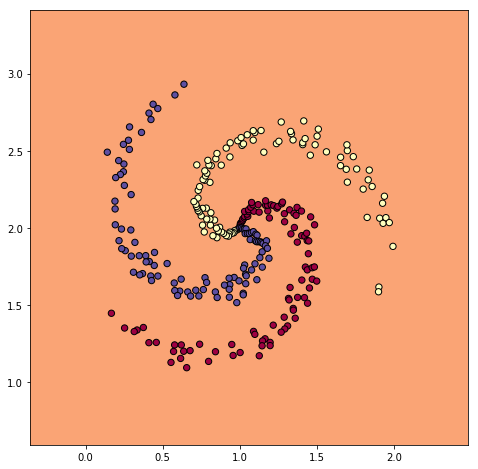

In [11]:
# plot the resulting classifier
plot()

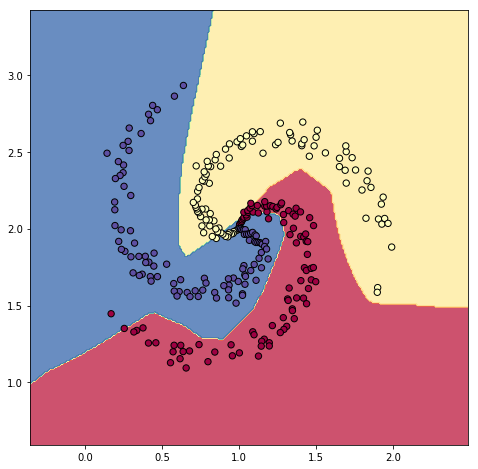

In [15]:
for i in range(200):
    loss, acc, _ = sess.run([t_loss, t_acc, train_op], feed_dict={t_x:X, t_y:y})
#     time.sleep(0.1)
    
    if i % 2 == 0:
        print("iteration %d:\tloss %f\tacc %f" % (i, loss, acc))
        clear_output(wait=True)
        plot(h=0.01)

In [16]:
# evaluate training set accuracy
print('training accuracy: %.2f%%' % 
      (100*sess.run(t_acc, feed_dict={t_x:X, t_y:y})))
sess.close()

training accuracy: 85.00%


In [54]:
from sklearn.datasets import make_gaussian_quantiles

In [55]:
x1, t = make_gaussian_quantiles(n_samples=700, cov=3)

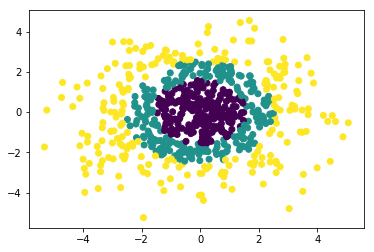

In [56]:
plt.scatter(x1.T[0], x1.T[1], c=t)

In [57]:
t_x = tf.placeholder(tf.float32, shape=[None, 2])
t_y = tf.placeholder(tf.int32, shape=[None])

In [58]:
W0 = tf.Variable(tf.random_normal([2, 100]))
b0 = tf.Variable(tf.zeros([1, 100], dtype=tf.float32))

In [59]:
W1 = tf.Variable(tf.random_normal([100, 50]))
b1 = tf.Variable(tf.zeros([1, 50], dtype=tf.float32))

In [60]:
W = tf.Variable(tf.random_normal([50, 3]))
b = tf.Variable(tf.zeros([1, 3], dtype=tf.float32))

In [61]:
step_size = 0.05
reg = 1e-3 # regularization strength

t_out0 = tf.matmul(t_x, W0) + b0

t_out0_1 = tf.nn.sigmoid(t_out0)

t_out1 = tf.matmul(t_out0_1, W1) + b1

t_out1_1 = tf.nn.relu(t_out1)

t_scores = tf.matmul(t_out1_1, W) + b
t_prediction = tf.argmax(t_scores, axis=-1, output_type=tf.int32)
t_acc = tf.reduce_mean(tf.cast(tf.equal(t_prediction, t_y), tf.float32))
t_loss_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
    labels=t_y, logits=t_scores)
t_loss_reg = tf.reduce_sum(W * W) * reg + tf.reduce_sum(W1 * W1) * reg
t_loss = tf.reduce_mean(t_loss_entropy + t_loss_reg)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=step_size)

train_op = optimizer.minimize(t_loss)

In [65]:
def plot1(h=0.02):
    x_min, x_max = x1[:, 0].min() - 0.5, x1[:, 0].max() + 0.5
    y_min, y_max = x1[:, 1].min() - 0.5, x1[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                 np.arange(y_min, y_max, h))
    Z = sess.run(t_prediction, feed_dict={t_x: np.column_stack([xx.ravel(), yy.ravel()])})
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10,8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(x1[:, 0], x1[:, 1], c=t, s=40, cmap=plt.cm.Spectral, edgecolors="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.gca().set_aspect("equal")
    plt.show()

In [66]:

if "sess" in dir():
    sess.close()
sess = tf.Session()
sess.run(tf.global_variables_initializer())

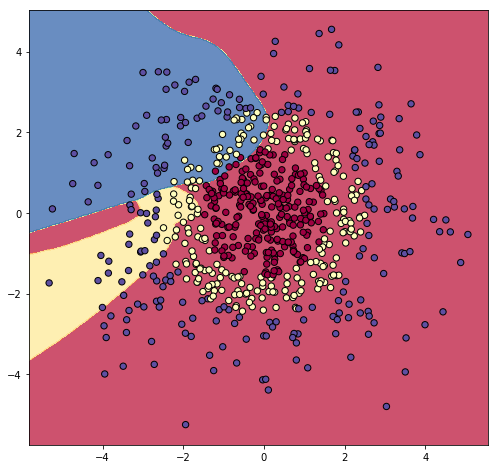

In [67]:
plot1()

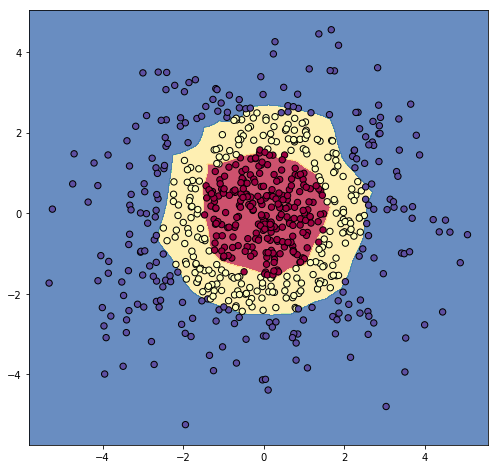

In [69]:
for i in range(200):
    loss, acc, _ = sess.run([t_loss, t_acc, train_op], feed_dict={t_x:x1, t_y:t})
#     time.sleep(0.1)
    
    if i % 2 == 0:
        print("iteration %d:\tloss %f\tacc %f" % (i, loss, acc))
        clear_output(wait=True)
        plot1(h=0.01)

In [70]:
# evaluate training set accuracy
print('training accuracy: %.2f%%' % 
      (100*sess.run(t_acc, feed_dict={t_x:x1, t_y:t})))

training accuracy: 97.00%


## The same model in **Keras**.

In [253]:
import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [254]:
model = Sequential()

In [255]:
model.add(Dense(100, activation='sigmoid', input_shape=(2,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(3, activation='softmax'))

opt = SGD(lr=0.05)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])



In [256]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
one_hot_y = np.array(enc.fit_transform(y.reshape(-1, 1)).todense())

/home/yeva/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [257]:
mask = np.arange(len(X))
np.random.shuffle(mask)
X = X[mask]
one_hot_y = one_hot_y[mask]
y = y[mask]
model.fit(X, one_hot_y, batch_size=100, epochs=2000)

Epoch 1/2000
300/300 [==============================] - 0s 1ms/step - loss: 1.1677 - acc: 0.3033
Epoch 2/2000
300/300 [==============================] - 0s 18us/step - loss: 1.1086 - acc: 0.2700
Epoch 3/2000
300/300 [==============================] - 0s 19us/step - loss: 1.1073 - acc: 0.3200
Epoch 4/2000
300/300 [==============================] - 0s 38us/step - loss: 1.1063 - acc: 0.2767
Epoch 5/2000
300/300 [==============================] - 0s 28us/step - loss: 1.1036 - acc: 0.3333
Epoch 6/2000
300/300 [==============================] - 0s 22us/step - loss: 1.1094 - acc: 0.2867
Epoch 7/2000
300/300 [==============================] - 0s 18us/step - loss: 1.1038 - acc: 0.3167
Epoch 8/2000
300/300 [==============================] - 0s 22us/step - loss: 1.1031 - acc: 0.3267
Epoch 9/2000
300/300 [==============================] - 0s 36us/step - loss: 1.0989 - acc: 0.3067
Epoch 10/2000
300/300 [==============================] - 0s 22us/step - loss: 1.0984 - acc: 0.3367
Epoch 11/2000
300/30

300/300 [==============================] - 0s 18us/step - loss: 1.0349 - acc: 0.5400
Epoch 84/2000
300/300 [==============================] - 0s 28us/step - loss: 1.0398 - acc: 0.5300
Epoch 85/2000
300/300 [==============================] - 0s 18us/step - loss: 1.0339 - acc: 0.5000
Epoch 86/2000
300/300 [==============================] - 0s 22us/step - loss: 1.0370 - acc: 0.5300
Epoch 87/2000
300/300 [==============================] - 0s 39us/step - loss: 1.0325 - acc: 0.5400
Epoch 88/2000
300/300 [==============================] - 0s 32us/step - loss: 1.0284 - acc: 0.5300
Epoch 89/2000
300/300 [==============================] - 0s 29us/step - loss: 1.0275 - acc: 0.5467
Epoch 90/2000
300/300 [==============================] - 0s 21us/step - loss: 1.0332 - acc: 0.5433
Epoch 91/2000
300/300 [==============================] - 0s 22us/step - loss: 1.0286 - acc: 0.5700
Epoch 92/2000
300/300 [==============================] - 0s 22us/step - loss: 1.0271 - acc: 0.5500
Epoch 93/2000
300/300 [=

300/300 [==============================] - 0s 21us/step - loss: 0.9242 - acc: 0.5500
Epoch 166/2000
300/300 [==============================] - 0s 32us/step - loss: 0.9132 - acc: 0.5233
Epoch 167/2000
300/300 [==============================] - 0s 26us/step - loss: 0.9254 - acc: 0.5533
Epoch 168/2000
300/300 [==============================] - 0s 29us/step - loss: 0.9196 - acc: 0.5633
Epoch 169/2000
300/300 [==============================] - 0s 27us/step - loss: 0.9624 - acc: 0.5067
Epoch 170/2000
300/300 [==============================] - 0s 32us/step - loss: 0.9897 - acc: 0.4967
Epoch 171/2000
300/300 [==============================] - 0s 36us/step - loss: 0.9332 - acc: 0.5967
Epoch 172/2000
300/300 [==============================] - 0s 25us/step - loss: 0.9053 - acc: 0.5400
Epoch 173/2000
300/300 [==============================] - 0s 26us/step - loss: 0.8990 - acc: 0.5233
Epoch 174/2000
300/300 [==============================] - 0s 19us/step - loss: 0.9250 - acc: 0.5767
Epoch 175/2000


300/300 [==============================] - 0s 26us/step - loss: 0.9157 - acc: 0.5200
Epoch 248/2000
300/300 [==============================] - 0s 24us/step - loss: 0.8057 - acc: 0.5433
Epoch 249/2000
300/300 [==============================] - 0s 28us/step - loss: 0.8179 - acc: 0.5700
Epoch 250/2000
300/300 [==============================] - 0s 25us/step - loss: 0.8294 - acc: 0.5833
Epoch 251/2000
300/300 [==============================] - 0s 22us/step - loss: 0.8354 - acc: 0.5500
Epoch 252/2000
300/300 [==============================] - 0s 21us/step - loss: 0.8823 - acc: 0.5267
Epoch 253/2000
300/300 [==============================] - 0s 38us/step - loss: 0.8228 - acc: 0.5967
Epoch 254/2000
300/300 [==============================] - 0s 32us/step - loss: 0.8057 - acc: 0.5367
Epoch 255/2000
300/300 [==============================] - 0s 27us/step - loss: 0.8050 - acc: 0.5767
Epoch 256/2000
300/300 [==============================] - 0s 23us/step - loss: 0.7908 - acc: 0.5433
Epoch 257/2000


300/300 [==============================] - 0s 17us/step - loss: 0.8408 - acc: 0.5500
Epoch 330/2000
300/300 [==============================] - 0s 33us/step - loss: 0.7799 - acc: 0.5400
Epoch 331/2000
300/300 [==============================] - 0s 20us/step - loss: 0.7786 - acc: 0.5300
Epoch 332/2000
300/300 [==============================] - 0s 25us/step - loss: 0.8084 - acc: 0.5800
Epoch 333/2000
300/300 [==============================] - 0s 27us/step - loss: 0.7659 - acc: 0.5533
Epoch 334/2000
300/300 [==============================] - 0s 25us/step - loss: 0.7713 - acc: 0.5567
Epoch 335/2000
300/300 [==============================] - 0s 26us/step - loss: 0.7690 - acc: 0.5333
Epoch 336/2000
300/300 [==============================] - 0s 29us/step - loss: 0.7781 - acc: 0.5800
Epoch 337/2000
300/300 [==============================] - 0s 22us/step - loss: 0.7793 - acc: 0.5567
Epoch 338/2000
300/300 [==============================] - 0s 27us/step - loss: 0.9477 - acc: 0.5333
Epoch 339/2000


300/300 [==============================] - 0s 25us/step - loss: 0.7746 - acc: 0.5700
Epoch 411/2000
300/300 [==============================] - 0s 33us/step - loss: 0.7691 - acc: 0.5833
Epoch 412/2000
300/300 [==============================] - 0s 21us/step - loss: 0.8912 - acc: 0.5333
Epoch 413/2000
300/300 [==============================] - 0s 30us/step - loss: 0.8021 - acc: 0.5667
Epoch 414/2000
300/300 [==============================] - 0s 21us/step - loss: 0.7591 - acc: 0.5433
Epoch 415/2000
300/300 [==============================] - 0s 20us/step - loss: 0.7448 - acc: 0.5167
Epoch 416/2000
300/300 [==============================] - 0s 30us/step - loss: 0.7510 - acc: 0.5633
Epoch 417/2000
300/300 [==============================] - 0s 31us/step - loss: 0.7931 - acc: 0.5500
Epoch 418/2000
300/300 [==============================] - 0s 21us/step - loss: 0.7873 - acc: 0.5967
Epoch 419/2000
300/300 [==============================] - 0s 31us/step - loss: 0.7559 - acc: 0.5467
Epoch 420/2000


300/300 [==============================] - 0s 21us/step - loss: 0.8079 - acc: 0.5667
Epoch 493/2000
300/300 [==============================] - 0s 28us/step - loss: 0.7879 - acc: 0.5767
Epoch 494/2000
300/300 [==============================] - 0s 20us/step - loss: 0.7488 - acc: 0.5633
Epoch 495/2000
300/300 [==============================] - 0s 26us/step - loss: 0.7359 - acc: 0.5600
Epoch 496/2000
300/300 [==============================] - 0s 17us/step - loss: 0.7443 - acc: 0.5233
Epoch 497/2000
300/300 [==============================] - 0s 18us/step - loss: 0.7765 - acc: 0.5733
Epoch 498/2000
300/300 [==============================] - 0s 29us/step - loss: 0.7502 - acc: 0.5567
Epoch 499/2000
300/300 [==============================] - 0s 18us/step - loss: 0.7550 - acc: 0.5733
Epoch 500/2000
300/300 [==============================] - 0s 29us/step - loss: 0.7552 - acc: 0.5400
Epoch 501/2000
300/300 [==============================] - 0s 18us/step - loss: 0.7964 - acc: 0.5667
Epoch 502/2000


300/300 [==============================] - 0s 26us/step - loss: 0.7636 - acc: 0.5767
Epoch 574/2000
300/300 [==============================] - 0s 30us/step - loss: 0.7779 - acc: 0.5700
Epoch 575/2000
300/300 [==============================] - 0s 30us/step - loss: 0.7599 - acc: 0.5700
Epoch 576/2000
300/300 [==============================] - 0s 34us/step - loss: 0.7538 - acc: 0.5533
Epoch 577/2000
300/300 [==============================] - 0s 26us/step - loss: 0.7484 - acc: 0.5867
Epoch 578/2000
300/300 [==============================] - 0s 31us/step - loss: 0.7265 - acc: 0.5433
Epoch 579/2000
300/300 [==============================] - 0s 28us/step - loss: 0.7324 - acc: 0.5367
Epoch 580/2000
300/300 [==============================] - 0s 31us/step - loss: 0.7346 - acc: 0.5633
Epoch 581/2000
300/300 [==============================] - 0s 22us/step - loss: 0.7394 - acc: 0.5567
Epoch 582/2000
300/300 [==============================] - 0s 24us/step - loss: 0.7228 - acc: 0.5667
Epoch 583/2000


300/300 [==============================] - 0s 28us/step - loss: 0.7362 - acc: 0.5900
Epoch 656/2000
300/300 [==============================] - 0s 27us/step - loss: 0.7294 - acc: 0.5467
Epoch 657/2000
300/300 [==============================] - 0s 22us/step - loss: 0.7613 - acc: 0.5600
Epoch 658/2000
300/300 [==============================] - 0s 23us/step - loss: 0.7323 - acc: 0.5600
Epoch 659/2000
300/300 [==============================] - 0s 26us/step - loss: 0.7165 - acc: 0.5667
Epoch 660/2000
300/300 [==============================] - 0s 21us/step - loss: 0.7337 - acc: 0.5633
Epoch 661/2000
300/300 [==============================] - 0s 26us/step - loss: 0.7370 - acc: 0.5900
Epoch 662/2000
300/300 [==============================] - 0s 26us/step - loss: 0.7523 - acc: 0.5567
Epoch 663/2000
300/300 [==============================] - 0s 31us/step - loss: 0.7449 - acc: 0.5700
Epoch 664/2000
300/300 [==============================] - 0s 18us/step - loss: 0.7340 - acc: 0.5600
Epoch 665/2000


300/300 [==============================] - 0s 31us/step - loss: 0.7346 - acc: 0.6000
Epoch 738/2000
300/300 [==============================] - 0s 26us/step - loss: 0.7284 - acc: 0.5867
Epoch 739/2000
300/300 [==============================] - 0s 31us/step - loss: 0.7427 - acc: 0.5600
Epoch 740/2000
300/300 [==============================] - 0s 25us/step - loss: 0.7444 - acc: 0.5800
Epoch 741/2000
300/300 [==============================] - 0s 27us/step - loss: 0.7502 - acc: 0.6067
Epoch 742/2000
300/300 [==============================] - 0s 27us/step - loss: 0.7152 - acc: 0.5567
Epoch 743/2000
300/300 [==============================] - 0s 31us/step - loss: 0.7191 - acc: 0.6100
Epoch 744/2000
300/300 [==============================] - 0s 32us/step - loss: 0.7407 - acc: 0.5933
Epoch 745/2000
300/300 [==============================] - 0s 30us/step - loss: 0.7042 - acc: 0.5467
Epoch 746/2000
300/300 [==============================] - 0s 25us/step - loss: 0.7256 - acc: 0.5967
Epoch 747/2000


300/300 [==============================] - 0s 34us/step - loss: 0.6971 - acc: 0.5767
Epoch 820/2000
300/300 [==============================] - 0s 26us/step - loss: 0.6916 - acc: 0.5667
Epoch 821/2000
300/300 [==============================] - 0s 25us/step - loss: 0.6923 - acc: 0.5767
Epoch 822/2000
300/300 [==============================] - 0s 20us/step - loss: 0.6895 - acc: 0.5933
Epoch 823/2000
300/300 [==============================] - 0s 20us/step - loss: 0.6950 - acc: 0.5733
Epoch 824/2000
300/300 [==============================] - 0s 30us/step - loss: 0.7049 - acc: 0.6467
Epoch 825/2000
300/300 [==============================] - 0s 26us/step - loss: 0.7074 - acc: 0.5667
Epoch 826/2000
300/300 [==============================] - 0s 31us/step - loss: 0.7124 - acc: 0.5733
Epoch 827/2000
300/300 [==============================] - 0s 26us/step - loss: 0.7136 - acc: 0.5833
Epoch 828/2000
300/300 [==============================] - 0s 23us/step - loss: 0.7548 - acc: 0.6000
Epoch 829/2000


300/300 [==============================] - 0s 32us/step - loss: 0.6795 - acc: 0.6233
Epoch 902/2000
300/300 [==============================] - 0s 24us/step - loss: 0.6784 - acc: 0.5933
Epoch 903/2000
300/300 [==============================] - 0s 27us/step - loss: 0.6954 - acc: 0.6000
Epoch 904/2000
300/300 [==============================] - 0s 24us/step - loss: 0.6806 - acc: 0.5933
Epoch 905/2000
300/300 [==============================] - 0s 25us/step - loss: 0.6739 - acc: 0.5933
Epoch 906/2000
300/300 [==============================] - 0s 34us/step - loss: 0.8018 - acc: 0.5600
Epoch 907/2000
300/300 [==============================] - 0s 28us/step - loss: 0.7006 - acc: 0.6000
Epoch 908/2000
300/300 [==============================] - 0s 32us/step - loss: 0.6895 - acc: 0.6300
Epoch 909/2000
300/300 [==============================] - 0s 21us/step - loss: 0.6925 - acc: 0.6067
Epoch 910/2000
300/300 [==============================] - 0s 19us/step - loss: 0.6828 - acc: 0.6067
Epoch 911/2000


300/300 [==============================] - 0s 25us/step - loss: 0.7196 - acc: 0.6267
Epoch 984/2000
300/300 [==============================] - 0s 26us/step - loss: 0.6558 - acc: 0.6200
Epoch 985/2000
300/300 [==============================] - 0s 22us/step - loss: 0.6670 - acc: 0.6133
Epoch 986/2000
300/300 [==============================] - 0s 28us/step - loss: 0.6952 - acc: 0.6467
Epoch 987/2000
300/300 [==============================] - 0s 19us/step - loss: 0.7060 - acc: 0.6300
Epoch 988/2000
300/300 [==============================] - 0s 22us/step - loss: 0.6622 - acc: 0.6267
Epoch 989/2000
300/300 [==============================] - 0s 26us/step - loss: 0.6965 - acc: 0.6033
Epoch 990/2000
300/300 [==============================] - 0s 27us/step - loss: 0.6593 - acc: 0.6067
Epoch 991/2000
300/300 [==============================] - 0s 25us/step - loss: 0.6667 - acc: 0.6100
Epoch 992/2000
300/300 [==============================] - 0s 27us/step - loss: 0.6754 - acc: 0.6133
Epoch 993/2000


300/300 [==============================] - 0s 24us/step - loss: 0.7027 - acc: 0.6333
Epoch 1065/2000
300/300 [==============================] - 0s 26us/step - loss: 0.6471 - acc: 0.6600
Epoch 1066/2000
300/300 [==============================] - 0s 27us/step - loss: 0.6938 - acc: 0.6200
Epoch 1067/2000
300/300 [==============================] - 0s 19us/step - loss: 0.6573 - acc: 0.6400
Epoch 1068/2000
300/300 [==============================] - 0s 22us/step - loss: 0.6513 - acc: 0.6567
Epoch 1069/2000
300/300 [==============================] - 0s 27us/step - loss: 0.6462 - acc: 0.6467
Epoch 1070/2000
300/300 [==============================] - 0s 28us/step - loss: 0.6644 - acc: 0.6267
Epoch 1071/2000
300/300 [==============================] - 0s 24us/step - loss: 0.6348 - acc: 0.6400
Epoch 1072/2000
300/300 [==============================] - 0s 27us/step - loss: 0.6429 - acc: 0.6633
Epoch 1073/2000
300/300 [==============================] - 0s 33us/step - loss: 0.6291 - acc: 0.6567
Epoch 

300/300 [==============================] - 0s 23us/step - loss: 0.6213 - acc: 0.6267
Epoch 1146/2000
300/300 [==============================] - 0s 21us/step - loss: 0.6373 - acc: 0.6800
Epoch 1147/2000
300/300 [==============================] - 0s 34us/step - loss: 0.6751 - acc: 0.6567
Epoch 1148/2000
300/300 [==============================] - 0s 20us/step - loss: 0.6395 - acc: 0.6600
Epoch 1149/2000
300/300 [==============================] - 0s 29us/step - loss: 0.6410 - acc: 0.6467
Epoch 1150/2000
300/300 [==============================] - 0s 23us/step - loss: 0.7069 - acc: 0.6733
Epoch 1151/2000
300/300 [==============================] - 0s 33us/step - loss: 0.6356 - acc: 0.6800
Epoch 1152/2000
300/300 [==============================] - 0s 21us/step - loss: 0.6273 - acc: 0.6767
Epoch 1153/2000
300/300 [==============================] - 0s 26us/step - loss: 0.6396 - acc: 0.6567
Epoch 1154/2000
300/300 [==============================] - 0s 23us/step - loss: 0.7081 - acc: 0.6633
Epoch 

300/300 [==============================] - 0s 32us/step - loss: 0.6230 - acc: 0.6967
Epoch 1227/2000
300/300 [==============================] - 0s 27us/step - loss: 0.6125 - acc: 0.6767
Epoch 1228/2000
300/300 [==============================] - 0s 27us/step - loss: 0.6230 - acc: 0.6800
Epoch 1229/2000
300/300 [==============================] - 0s 22us/step - loss: 0.5998 - acc: 0.6733
Epoch 1230/2000
300/300 [==============================] - 0s 20us/step - loss: 0.5997 - acc: 0.6833
Epoch 1231/2000
300/300 [==============================] - 0s 32us/step - loss: 0.5866 - acc: 0.6700
Epoch 1232/2000
300/300 [==============================] - 0s 25us/step - loss: 0.5937 - acc: 0.6667
Epoch 1233/2000
300/300 [==============================] - 0s 33us/step - loss: 0.5946 - acc: 0.6833
Epoch 1234/2000
300/300 [==============================] - 0s 28us/step - loss: 0.6532 - acc: 0.6700
Epoch 1235/2000
300/300 [==============================] - 0s 26us/step - loss: 0.6014 - acc: 0.6933
Epoch 

300/300 [==============================] - 0s 33us/step - loss: 0.5756 - acc: 0.7033
Epoch 1308/2000
300/300 [==============================] - 0s 23us/step - loss: 0.5851 - acc: 0.7033
Epoch 1309/2000
300/300 [==============================] - 0s 36us/step - loss: 0.6243 - acc: 0.6700
Epoch 1310/2000
300/300 [==============================] - 0s 21us/step - loss: 0.6033 - acc: 0.7200
Epoch 1311/2000
300/300 [==============================] - 0s 23us/step - loss: 0.5926 - acc: 0.7133
Epoch 1312/2000
300/300 [==============================] - 0s 34us/step - loss: 0.5827 - acc: 0.6967
Epoch 1313/2000
300/300 [==============================] - 0s 32us/step - loss: 0.5575 - acc: 0.7100
Epoch 1314/2000
300/300 [==============================] - 0s 22us/step - loss: 0.5761 - acc: 0.6933
Epoch 1315/2000
300/300 [==============================] - 0s 27us/step - loss: 0.5543 - acc: 0.6800
Epoch 1316/2000
300/300 [==============================] - 0s 30us/step - loss: 0.5548 - acc: 0.7033
Epoch 

300/300 [==============================] - 0s 25us/step - loss: 0.5737 - acc: 0.7467
Epoch 1389/2000
300/300 [==============================] - 0s 20us/step - loss: 0.5222 - acc: 0.7233
Epoch 1390/2000
300/300 [==============================] - 0s 25us/step - loss: 0.5911 - acc: 0.7233
Epoch 1391/2000
300/300 [==============================] - 0s 32us/step - loss: 0.5705 - acc: 0.7400
Epoch 1392/2000
300/300 [==============================] - 0s 23us/step - loss: 0.5633 - acc: 0.7367
Epoch 1393/2000
300/300 [==============================] - 0s 26us/step - loss: 0.5253 - acc: 0.7333
Epoch 1394/2000
300/300 [==============================] - 0s 37us/step - loss: 0.5410 - acc: 0.7367
Epoch 1395/2000
300/300 [==============================] - 0s 28us/step - loss: 0.5400 - acc: 0.7267
Epoch 1396/2000
300/300 [==============================] - 0s 27us/step - loss: 0.5907 - acc: 0.7267
Epoch 1397/2000
300/300 [==============================] - 0s 21us/step - loss: 0.6346 - acc: 0.6833
Epoch 

300/300 [==============================] - 0s 20us/step - loss: 0.4895 - acc: 0.7433
Epoch 1470/2000
300/300 [==============================] - 0s 18us/step - loss: 0.5157 - acc: 0.7667
Epoch 1471/2000
300/300 [==============================] - 0s 28us/step - loss: 0.5207 - acc: 0.7433
Epoch 1472/2000
300/300 [==============================] - 0s 19us/step - loss: 0.5090 - acc: 0.7567
Epoch 1473/2000
300/300 [==============================] - 0s 18us/step - loss: 0.5038 - acc: 0.7600
Epoch 1474/2000
300/300 [==============================] - 0s 24us/step - loss: 0.4851 - acc: 0.7633
Epoch 1475/2000
300/300 [==============================] - 0s 18us/step - loss: 0.4901 - acc: 0.7500
Epoch 1476/2000
300/300 [==============================] - 0s 36us/step - loss: 0.5509 - acc: 0.7333
Epoch 1477/2000
300/300 [==============================] - 0s 30us/step - loss: 0.5182 - acc: 0.7733
Epoch 1478/2000
300/300 [==============================] - 0s 19us/step - loss: 0.4945 - acc: 0.7733
Epoch 

300/300 [==============================] - 0s 25us/step - loss: 0.5082 - acc: 0.7767
Epoch 1551/2000
300/300 [==============================] - 0s 27us/step - loss: 0.4633 - acc: 0.7800
Epoch 1552/2000
300/300 [==============================] - 0s 25us/step - loss: 0.4587 - acc: 0.7967
Epoch 1553/2000
300/300 [==============================] - 0s 22us/step - loss: 0.4629 - acc: 0.7867
Epoch 1554/2000
300/300 [==============================] - 0s 22us/step - loss: 0.4511 - acc: 0.7800
Epoch 1555/2000
300/300 [==============================] - 0s 33us/step - loss: 0.4550 - acc: 0.7900
Epoch 1556/2000
300/300 [==============================] - 0s 25us/step - loss: 0.4761 - acc: 0.7933
Epoch 1557/2000
300/300 [==============================] - 0s 23us/step - loss: 0.5533 - acc: 0.7767
Epoch 1558/2000
300/300 [==============================] - 0s 20us/step - loss: 0.4856 - acc: 0.7767
Epoch 1559/2000
300/300 [==============================] - 0s 25us/step - loss: 0.5309 - acc: 0.7633
Epoch 

300/300 [==============================] - 0s 26us/step - loss: 0.4466 - acc: 0.8167
Epoch 1632/2000
300/300 [==============================] - 0s 23us/step - loss: 0.4301 - acc: 0.8133
Epoch 1633/2000
300/300 [==============================] - 0s 25us/step - loss: 0.4446 - acc: 0.8233
Epoch 1634/2000
300/300 [==============================] - 0s 27us/step - loss: 0.4680 - acc: 0.7867
Epoch 1635/2000
300/300 [==============================] - 0s 21us/step - loss: 0.4958 - acc: 0.7900
Epoch 1636/2000
300/300 [==============================] - 0s 37us/step - loss: 0.4517 - acc: 0.7833
Epoch 1637/2000
300/300 [==============================] - 0s 31us/step - loss: 0.4463 - acc: 0.8167
Epoch 1638/2000
300/300 [==============================] - 0s 25us/step - loss: 0.5009 - acc: 0.7933
Epoch 1639/2000
300/300 [==============================] - 0s 20us/step - loss: 0.4415 - acc: 0.8167
Epoch 1640/2000
300/300 [==============================] - 0s 24us/step - loss: 0.4406 - acc: 0.8167
Epoch 

300/300 [==============================] - 0s 29us/step - loss: 0.4050 - acc: 0.8167
Epoch 1713/2000
300/300 [==============================] - 0s 21us/step - loss: 0.4954 - acc: 0.7800
Epoch 1714/2000
300/300 [==============================] - 0s 21us/step - loss: 0.4024 - acc: 0.8333
Epoch 1715/2000
300/300 [==============================] - 0s 24us/step - loss: 0.3976 - acc: 0.8367
Epoch 1716/2000
300/300 [==============================] - 0s 29us/step - loss: 0.4383 - acc: 0.8000
Epoch 1717/2000
300/300 [==============================] - 0s 22us/step - loss: 0.5271 - acc: 0.7467
Epoch 1718/2000
300/300 [==============================] - 0s 28us/step - loss: 0.4117 - acc: 0.8133
Epoch 1719/2000
300/300 [==============================] - 0s 25us/step - loss: 0.4555 - acc: 0.8033
Epoch 1720/2000
300/300 [==============================] - 0s 31us/step - loss: 0.4423 - acc: 0.7967
Epoch 1721/2000
300/300 [==============================] - 0s 39us/step - loss: 0.4290 - acc: 0.7967
Epoch 

300/300 [==============================] - 0s 20us/step - loss: 0.3835 - acc: 0.8400
Epoch 1794/2000
300/300 [==============================] - 0s 28us/step - loss: 0.3819 - acc: 0.8233
Epoch 1795/2000
300/300 [==============================] - 0s 18us/step - loss: 0.4054 - acc: 0.8167
Epoch 1796/2000
300/300 [==============================] - 0s 18us/step - loss: 0.3950 - acc: 0.8300
Epoch 1797/2000
300/300 [==============================] - 0s 26us/step - loss: 0.3711 - acc: 0.8667
Epoch 1798/2000
300/300 [==============================] - 0s 21us/step - loss: 0.3599 - acc: 0.8267
Epoch 1799/2000
300/300 [==============================] - 0s 26us/step - loss: 0.4185 - acc: 0.8033
Epoch 1800/2000
300/300 [==============================] - 0s 29us/step - loss: 0.3764 - acc: 0.8333
Epoch 1801/2000
300/300 [==============================] - 0s 22us/step - loss: 0.3603 - acc: 0.8367
Epoch 1802/2000
300/300 [==============================] - 0s 30us/step - loss: 0.3773 - acc: 0.8333
Epoch 

300/300 [==============================] - 0s 25us/step - loss: 0.3654 - acc: 0.8500
Epoch 1875/2000
300/300 [==============================] - 0s 23us/step - loss: 0.3944 - acc: 0.8267
Epoch 1876/2000
300/300 [==============================] - 0s 22us/step - loss: 0.3535 - acc: 0.8667
Epoch 1877/2000
300/300 [==============================] - 0s 23us/step - loss: 0.3565 - acc: 0.8567
Epoch 1878/2000
300/300 [==============================] - 0s 30us/step - loss: 0.4163 - acc: 0.8100
Epoch 1879/2000
300/300 [==============================] - 0s 22us/step - loss: 0.3765 - acc: 0.8467
Epoch 1880/2000
300/300 [==============================] - 0s 29us/step - loss: 0.3544 - acc: 0.8467
Epoch 1881/2000
300/300 [==============================] - 0s 21us/step - loss: 0.3432 - acc: 0.8467
Epoch 1882/2000
300/300 [==============================] - 0s 26us/step - loss: 0.3377 - acc: 0.8467
Epoch 1883/2000
300/300 [==============================] - 0s 23us/step - loss: 0.3548 - acc: 0.8467
Epoch 

300/300 [==============================] - 0s 26us/step - loss: 0.3448 - acc: 0.8567
Epoch 1955/2000
300/300 [==============================] - 0s 23us/step - loss: 0.3248 - acc: 0.8567
Epoch 1956/2000
300/300 [==============================] - 0s 22us/step - loss: 0.3272 - acc: 0.8867
Epoch 1957/2000
300/300 [==============================] - 0s 18us/step - loss: 0.3912 - acc: 0.8067
Epoch 1958/2000
300/300 [==============================] - 0s 18us/step - loss: 0.3268 - acc: 0.8667
Epoch 1959/2000
300/300 [==============================] - 0s 30us/step - loss: 0.3211 - acc: 0.8800
Epoch 1960/2000
300/300 [==============================] - 0s 22us/step - loss: 0.3347 - acc: 0.8733
Epoch 1961/2000
300/300 [==============================] - 0s 26us/step - loss: 0.3194 - acc: 0.8867
Epoch 1962/2000
300/300 [==============================] - 0s 22us/step - loss: 0.3372 - acc: 0.8500
Epoch 1963/2000
300/300 [==============================] - 0s 26us/step - loss: 0.3870 - acc: 0.8267
Epoch 

In [258]:
prediction = model.predict(X).argmax(axis=1)

In [259]:

prediction

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 2, 2, 0, 1, 1, 0, 2, 0, 1, 1, 0, 2, 2,
       2, 2, 0, 1, 0, 2, 1, 2, 0, 0, 2, 0, 1, 0, 2, 2, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 2, 2, 1, 2, 0, 1, 2, 0, 0, 2, 2, 0, 1, 0, 1, 0, 2, 0, 1,
       0, 0, 1, 0, 2, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 0, 1, 2, 0, 0, 2, 1,
       0, 2, 2, 1, 1, 0, 2, 0, 2, 0, 0, 1, 2, 0, 1, 1, 2, 1, 1, 0, 2, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 1, 0, 2, 0, 2, 1, 1, 2,
       1, 2, 2, 1, 0, 1, 0, 0, 2, 1, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 1, 1,
       1, 1, 1, 2, 0, 0, 1, 1, 2, 2, 0, 2, 1, 0, 1, 2, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 2, 2, 2, 2, 0, 1, 0, 0, 2, 1, 1, 0, 1, 0, 1,
       0, 2, 0, 0, 2, 2, 2, 1, 0, 2, 0, 0, 0, 1, 0, 2, 2, 0, 1, 0, 2, 0,
       2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 1, 2, 2, 2, 2, 2,
       0, 2, 0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 1, 2, 0, 0, 2, 1, 0, 1, 1, 0,
       1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       2, 1, 1, 1, 1, 1, 0, 1, 2, 0, 2, 0, 2, 2])

In [260]:
from sklearn.metrics import accuracy_score
accuracy_score(prediction, y)

0.8633333333333333

In [261]:
def plot(h=0.02):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                 np.arange(y_min, y_max, h))
    
    Z = model.predict(np.column_stack([xx.ravel(), yy.ravel()])).argmax(axis=1)
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10,8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral, edgecolors="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.gca().set_aspect("equal")
    plt.show()

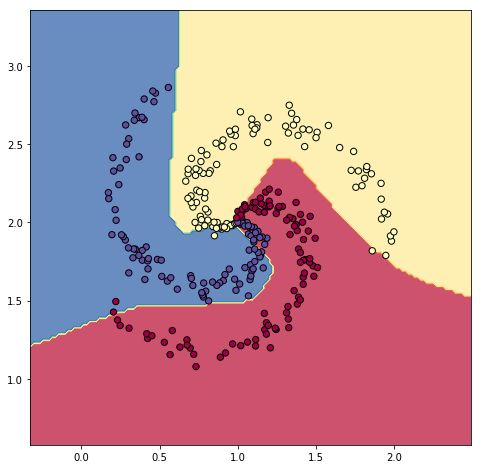

In [262]:
plot()